<h1>Performance Comparisons of Different Activation Functions on the training of Neural Networks</h1>
<p>In this Jupyter Notebook, I have demonstrated the effect of various activation functions in the training of deep neural networks.The activation functions used are :-</p>
<ul>
    <li>Sigmoid activation</li>
    <li>Tanh activation</li>
    <li>ReLU activation</li>
</ul>
<p>This notebook was trained using <a href="http://colab.research.google.com">Google Colab</a> on a <b>TPU runtime!</b> :D</p>

<h2>Libraries Used</h2>
<p>The packages/libraries imported are :-</p>
<ul>
    <li>NumPy, for vectorization operations.</li>
    <li>Pandas, for reading and manipulating the dataset.</li>
    <li>Matplotlib, for visualization.</li>
    <li>Keras (with Tensorflow backend), for constructing and training the CNN model.</li>
</ul>

In [0]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


<h2>Importing the dataset</h2>
<p>I used the MNIST dataset, downloaded from Google Colab's sample data files.</p>
<p>The MNIST dataset is stored in CSV format. So, Pandas can easily import the data using the read_csv( ) function as shown below.</p>

In [0]:
training_dataset = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
print(training_dataset.head())

   0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
0    6    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2    7    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3    9    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[5 rows x 785 columns]


<h2>Getting the labels of the digits</h2>
<p>From the dataset structure, we see that the labels for the digits are stored in the first column i.e index = 0 in the Pandas dataframe. To extract only this column, we simply subset it using the index and convert it to a NumPy array as shown below.</p>

In [0]:
train_labels = training_dataset[0].values
print(train_labels)
print(train_labels.shape)

[6 5 7 ... 2 9 5]
(20000,)


<h2>Getting the digit images</h2>
<p>From the dataset structure, we see that the pixel intensity values are stored starting from the second column i.e from index = 1 in the Pandas dataframe. Here, for one digit image, there are 784 pixel intensity values. This is the reason there are 784 columns.</p>
<p>Moreover, these digit images are grayscale or black and white in layman's language. Therefore, there is only a single colour channel for the images.</p>
<p>We simple drop/remove the first column from the dataset in order to retrive the values.</p>

In [0]:
training_images = training_dataset.drop([0], axis=1).values
print(training_images.shape)

(20000, 784)


<h2>Reshaping the images</h2>
<p>In order to represent the pixel intensity values into 2 dimensional images, we use the reshape( ) function of NumPy array. We see that there 20,000 images of the dimensions 28 x 28 with only 1 colour channel.</p>

In [0]:
train_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
print(train_images.shape)

(20000, 28, 28, 1)


<h2>CNN Model with different activation functions</h2>
<p>Let's start making the CNN model. The CNN model follows the popular LeNet-5 architecture. This model is built using Keras libary supported with Tensorflow as computation backend engine.</p>
<p>For each model shown follows, uses RMSProp optimization algorithm and Sparse Categorical Crossentropy loss function (as the labels are integers and not one-hot encoded). Moreover, the output layer requires the softmax function as it a multi-class classification problem.</p>
<p>Each model is trained for 10 epochs with the accuracies and losses stored for comparisons later on.</p>

<h3>Sigmoid activation CNN model</h3>

In [0]:
sigmoid_model = Sequential([
    Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=120, activation='sigmoid'),
    Dense(units=84, activation='sigmoid'),
    Dense(units=10, activation='softmax')
])

sigmoid_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
sigmoid_history = sigmoid_model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 14s 676us/step - loss: 1.1484 - acc: 0.6515
Epoch 2/10
20000/20000 [==============================] - 13s 664us/step - loss: 0.2236 - acc: 0.9371
Epoch 3/10
20000/20000 [==============================] - 13s 668us/step - loss: 0.1425 - acc: 0.9568
Epoch 4/10
20000/20000 [==============================] - 13s 668us/step - loss: 0.1112 - acc: 0.9662
Epoch 5/10
20000/20000 [==============================] - 13s 661us/step - loss: 0.0949 - acc: 0.9707
Epoch 6/10
20000/20000 [==============================] - 13s 652us/step - loss: 0.0833 - acc: 0.9736
Epoch 7/10
20000/20000 [==============================] - 14s 677us/step - loss: 0.0755 - acc: 0.9763
Epoch 8/10
20000/20000 [==============================] - 13s 657us/step - loss: 0.0689 - acc: 0.9776
Epoch 9/10
20000/20000 [==============================] - 13s 65

<h3>Tanh activation CNN model</h3>

In [0]:
tanh_model = Sequential([
    Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])

tanh_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
tanh_history = tanh_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20000/20000 [==============================] - 13s 664us/step - loss: 0.2949 - acc: 0.9098
Epoch 2/10
20000/20000 [==============================] - 13s 655us/step - loss: 0.1163 - acc: 0.9637
Epoch 3/10
20000/20000 [==============================] - 13s 653us/step - loss: 0.0854 - acc: 0.9730
Epoch 4/10
20000/20000 [==============================] - 13s 654us/step - loss: 0.0655 - acc: 0.9786
Epoch 5/10
20000/20000 [==============================] - 13s 652us/step - loss: 0.0514 - acc: 0.9835
Epoch 6/10
20000/20000 [==============================] - 13s 653us/step - loss: 0.0451 - acc: 0.9855
Epoch 7/10
20000/20000 [==============================] - 13s 653us/step - loss: 0.0338 - acc: 0.9878
Epoch 8/10
20000/20000 [==============================] - 13s 662us/step - loss: 0.0285 - acc: 0.9900
Epoch 9/10
20000/20000 [==============================] - 13s 654us/step - loss: 0.0245 - acc: 0.9921
Epoch 10/10
20000/20000 [==============================] - 13s 653us/step - loss: 

<h3>ReLU (Rectified Linear Unit) activation CNN model</h3>

In [0]:
relu_model = Sequential([
    Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=84, activation='relu'),
    Dense(units=10, activation='softmax')
])

relu_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
relu_history = relu_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20000/20000 [==============================] - 13s 662us/step - loss: 1.3409 - acc: 0.8261
Epoch 2/10
20000/20000 [==============================] - 13s 647us/step - loss: 0.1536 - acc: 0.9568
Epoch 3/10
20000/20000 [==============================] - 13s 647us/step - loss: 0.1020 - acc: 0.9721
Epoch 4/10
20000/20000 [==============================] - 13s 648us/step - loss: 0.0823 - acc: 0.9774
Epoch 5/10
20000/20000 [==============================] - 13s 649us/step - loss: 0.0697 - acc: 0.9821
Epoch 6/10
20000/20000 [==============================] - 13s 647us/step - loss: 0.0549 - acc: 0.9852
Epoch 7/10
20000/20000 [==============================] - 13s 646us/step - loss: 0.0490 - acc: 0.9883
Epoch 8/10
20000/20000 [==============================] - 13s 645us/step - loss: 0.0493 - acc: 0.9872
Epoch 9/10
20000/20000 [==============================] - 13s 647us/step - loss: 0.0435 - acc: 0.9901
Epoch 10/10
20000/20000 [==============================] - 13s 646us/step - loss: 

<h2>Losses and Accuracies</h2>
<p>Using history object provided by the fit( ) function in Keras, I can easily obtain the losses and accuracy of the model at each epoch during the training phase. I simple stored these values separately in different variables for easier visual comparisons.</p>

In [0]:
sigmoid_loss, sigmoid_acc = sigmoid_history.history['loss'], sigmoid_history.history['acc']
tanh_loss, tanh_acc = tanh_history.history['loss'], tanh_history.history['acc']
relu_loss, relu_acc = relu_history.history['loss'], relu_history.history['acc']

epochs=range(10)

<h2>Model Performance Chart</h2>
<p>In this section, I utilized the accuracies and losses collected from the various CNN models collected and plotted them as line charts using Matplotlib library.</p>

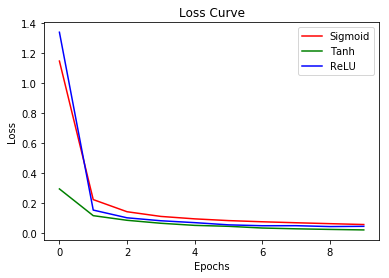

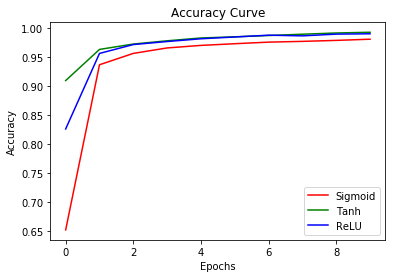

In [0]:
plt.plot(epochs, sigmoid_loss, label='Sigmoid', color='red')
plt.plot(epochs, tanh_loss, label='Tanh', color='green')
plt.plot(epochs, relu_loss, label='ReLU', color='blue')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, sigmoid_acc, label='Sigmoid', color='red')
plt.plot(epochs, tanh_acc, label='Tanh', color='green')
plt.plot(epochs, relu_acc, label='ReLU', color='blue')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



<h2>Report</h2>
<p>The line curves illustrate the loss and accuracy of the models trained over 10 epochs. These models are identified from the line colours shown in the graph and mentioned in the legend section.</p>
<p>From the loss curve, we can see that sigmoid activation function has the most loss overall. Tanh and ReLU activation functions have similar loss values throughout the training process.</p>
<p>From the accuracy curve, it can be observed that the sigmoid activation function begins the training process with the lowest accuracy level but later on, it stagnates at around 0.95 accuracy. The tanh and ReLU activation functions again, maintain similar accuracy levels during the training process.</p>
<p>All in all, it can be said that a neural network using sigmoid activation function takes longer to reach a good accuracy compaed to that network using a Tanh and ReLU activation function. We can alternatively use Tanh activation function or ReLu activation function to obtain good results in less number of epochs. Thus, it is advantageous to use these activation functions in your model instead of the sigmoid activation function.</p>